In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # we will use this library for --> (mode, skew, kurtosis, iqr) 

In [75]:
df_2021 = pd.read_csv('world-happiness-report-2021.csv')

In [76]:
df_2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [80]:
df_CE_Europe = df1_2021[df1_2021["Regional indicator"] == "Central and Eastern Europe"]
df_CE_Europe

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
17,Czech Republic,Central and Eastern Europe,6.965,10.556,0.947,70.807,0.858,-0.208,0.868
28,Slovenia,Central and Eastern Europe,6.461,10.529,0.948,71.400,0.949,-0.101,0.806
32,Kosovo,Central and Eastern Europe,6.372,9.318,0.821,63.813,0.869,0.257,0.917
33,Slovakia,Central and Eastern Europe,6.331,10.369,0.936,69.201,0.766,-0.124,0.911
37,Lithuania,Central and Eastern Europe,6.255,10.499,0.935,67.906,0.773,-0.203,0.826
39,Estonia,Central and Eastern Europe,6.189,10.481,0.941,68.800,0.909,-0.106,0.527
43,Poland,Central and Eastern Europe,6.166,10.382,0.898,69.702,0.841,-0.165,0.735
45,Romania,Central and Eastern Europe,6.140,10.284,0.832,67.355,0.845,-0.219,0.938
47,Serbia,Central and Eastern Europe,6.078,9.787,0.873,68.600,0.778,0.002,0.835
50,Latvia,Central and Eastern Europe,6.032,10.315,0.927,67.100,0.715,-0.162,0.800


In [83]:
df_CE_Europe.head(1)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
17,Czech Republic,Central and Eastern Europe,6.965,10.556,0.947,70.807,0.858,-0.208,0.868


In [85]:
df_CE_Europe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 17 to 93
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  17 non-null     object 
 1   Regional indicator            17 non-null     object 
 2   Ladder score                  17 non-null     float64
 3   Logged GDP per capita         17 non-null     float64
 4   Social support                17 non-null     float64
 5   Healthy life expectancy       17 non-null     float64
 6   Freedom to make life choices  17 non-null     float64
 7   Generosity                    17 non-null     float64
 8   Perceptions of corruption     17 non-null     float64
dtypes: float64(7), object(2)
memory usage: 1.3+ KB


In [86]:
df_CE_Europe.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,5.984765,10.109059,0.887412,68.338412,0.797059,-0.078941,0.850529
std,0.493325,0.396190,0.068297,1.909003,0.070521,0.126697,0.102474
min,5.101000,9.318000,0.697000,63.813000,0.706000,-0.219000,0.527000
25%,5.813000,9.787000,0.858000,67.355000,0.754000,-0.165000,0.812000
50%,6.078000,10.284000,0.924000,68.600000,0.778000,-0.106000,0.876000
75%,6.255000,10.382000,0.936000,69.201000,0.845000,-0.030000,0.917000
max,6.965000,10.556000,0.948000,71.400000,0.949000,0.257000,0.939000


### Basic Score Explanations of the Variables:
- **Ladder score**: Happiness score. 0 lowest, 10 maximum

- **Social Support**: Perceived social support score 0 lowest, 10 maximum

- **Freedom to make life choices**: Perceived freedom of expression 0 lowest, 10 maximum
- **Perceptions of corruption**: Perceived corruption and kind of distrust in institutions  0 lowest, 10 maximum distrust

In [102]:
df_CE_Europe["Perceptions of corruption"].describe()

count    17.000000
mean      0.850529
std       0.102474
min       0.527000
25%       0.812000
50%       0.876000
75%       0.917000
max       0.939000
Name: Perceptions of corruption, dtype: float64

In [103]:
Q1,Q3= np.percentile(df_CE_Europe["Perceptions of corruption"],[25,75])
Q1, Q3

(0.812, 0.917)

In [104]:
IQR = Q3-Q1
IQR

0.10499999999999998

In [105]:
stats.iqr(df_CE_Europe["Perceptions of corruption"])

0.10499999999999998

In [106]:
minimum = Q1-1.5*IQR
minimum

0.6545000000000001

In [107]:
maximum = Q3+1.5*IQR
maximum

1.0745

In [108]:
potential_outliers = df_CE_Europe[(df_CE_Europe["Perceptions of corruption"] < minimum) | (df_CE_Europe["Perceptions of corruption"] > maximum)]
potential_outliers

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
39,Estonia,Central and Eastern Europe,6.189,10.481,0.941,68.8,0.909,-0.106,0.527


In [113]:
df_CE_Europe_V=df_CE_Europe.drop([39])
df_CE_Europe_V.head(1)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
17,Czech Republic,Central and Eastern Europe,6.965,10.556,0.947,70.807,0.858,-0.208,0.868


In [114]:
df_CE_Europe_V.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,5.972000,10.085813,0.884062,68.309562,0.790063,-0.077250,0.870750
std,0.506596,0.397028,0.069080,1.967779,0.066461,0.130654,0.061538
min,5.101000,9.318000,0.697000,63.813000,0.706000,-0.219000,0.735000
25%,5.755000,9.763500,0.851500,67.291250,0.753250,-0.170250,0.822500
50%,6.055000,10.250500,0.911000,68.349000,0.775500,-0.109500,0.888500
75%,6.274000,10.372250,0.935250,69.326250,0.842000,-0.022000,0.920500
max,6.965000,10.556000,0.948000,71.400000,0.949000,0.257000,0.939000


In [115]:
np.cov(df_CE_Europe["Ladder score"],df_CE_Europe["Perceptions of corruption"])

array([[ 0.24336994, -0.01243562],
       [-0.01243562,  0.01050101]])

In [136]:
df_CE_Europe.corr()["Ladder score"]["Perceptions of corruption"]
# negatif yönde bir etkleşim var 

-0.24599045658333557

In [137]:
df_CE_Europe.corr()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.560664,0.582957,0.333319,0.518679,-0.276712,-0.245990
Logged GDP per capita,0.560664,1.000000,0.775892,0.597408,0.318199,-0.881543,-0.428930
Social support,0.582957,0.775892,1.000000,0.389284,0.158672,-0.507258,-0.318341
Healthy life expectancy,0.333319,0.597408,0.389284,1.000000,0.217689,-0.550233,-0.230517
Freedom to make life choices,0.518679,0.318199,0.158672,0.217689,1.000000,-0.084180,-0.410780
Generosity,-0.276712,-0.881543,-0.507258,-0.550233,-0.084180,1.000000,0.220205
Perceptions of corruption,-0.245990,-0.428930,-0.318341,-0.230517,-0.410780,0.220205,1.000000


<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Ladder score'>

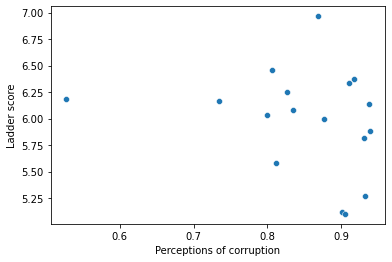

In [141]:
sns.scatterplot(data=df_CE_Europe,y="Ladder score",x="Perceptions of corruption")

In [ ]:
#aykırı değerler olmadan 8-9-10. sorular

In [143]:
np.cov(df_CE_Europe_V["Ladder score"],df_CE_Europe_V["Perceptions of corruption"])

array([[ 0.25664   , -0.00858427],
       [-0.00858427,  0.00378687]])

In [144]:
df_CE_Europe_V.corr()["Ladder score"]["Perceptions of corruption"]
# negatif yönde bir etkleşim var 

-0.27536010587821025

In [145]:
df_CE_Europe_V.corr()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.554392,0.576516,0.329186,0.523573,-0.272808,-0.275360
Logged GDP per capita,0.554392,1.000000,0.765034,0.601330,0.247616,-0.896167,-0.411408
Social support,0.576516,0.765034,1.000000,0.385379,0.085003,-0.507363,-0.270159
Healthy life expectancy,0.329186,0.601330,0.385379,1.000000,0.211039,-0.548700,-0.309871
Freedom to make life choices,0.523573,0.247616,0.085003,0.211039,1.000000,-0.067682,-0.146977
Generosity,-0.272808,-0.896167,-0.507363,-0.548700,-0.067682,1.000000,0.302168
Perceptions of corruption,-0.275360,-0.411408,-0.270159,-0.309871,-0.146977,0.302168,1.000000


<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Ladder score'>

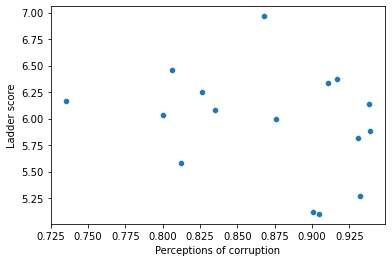

In [147]:
sns.scatterplot(data=df_CE_Europe_V,y="Ladder score",x="Perceptions of corruption")